# EMS Data Preprocessing

## Notebook Preps

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext dotenv
%dotenv

In [2]:
# change current directory to the project directory
import os
os.chdir('../../../')

In [3]:
!pip install -r ai/requirements.txt --user
!pip install plotly
!pip install matplotlib
!pip install seaborn
!pip install python-dotenv


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


First let's set environment variables. (in .env file in ai folder) (Note: also run the proxy script) Example would be

```env
CLUSTER_NAME=dev
DB_USER=asdf
DB_PASS=asdf
DB_ADDR=127.0.0.1
DB_PORT=5432
DB_NAME=lynus
DB_MODE=disable
S3_ENDPOINT=sos-at-vie-1.exo.io
S3_ACCESS_KEY=asdf
S3_SECRET_KEY=asdf
S3_SECURE=1
EMPA_ADDR=http://127.0.0.1:9000/
WEATHER_API_KEY=asdf
```

In [4]:
from dotenv import load_dotenv

load_dotenv("./ai/.env.bms", override=True)

True

### Plotting utils

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = [
'#03e0b5',
'#24AD92',
'#327A6C',
'#2C4742',
'#293331',]

# Plot errors
def plot_errors(error_dict, prefix):
    fig, axes = plt.subplots(nrows=1, ncols=len(error_dict), sharey=False)
    for i, (key, value) in enumerate(error_dict.items()):
        
        # Extract keys and values from the dictionary
        model_names = list(value.keys())
        errors = list(value.values())

        # Create a bar chart using seaborn
        sns.set(style="white")
        plt.figure(figsize=(10, 6))
        axes[i].set_title(f'{key}')

        ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
        ax.legend_.remove()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        for p in ax.patches:
            if p.get_width() == p.get_height() == 0:
                continue
            
            ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
            fontsize=12, color=p.get_facecolor(), ha='center', va='bottom')

    return fig


## Testing

Fetch all models first

In [6]:
import psycopg
import pandas as pd

# Get DB connection and all EMS models

try:
    # Establish a connection to the PostgreSQL database
    connection = psycopg.connect(
        dbname=os.environ["DB_NAME"],
        user=os.environ["DB_USER"],
        password=os.environ["DB_PASS"],
        host=os.environ["DB_ADDR"],
        port=os.environ["DB_PORT"]
    )

    # Create a cursor object to interact with the database
    cursor = connection.cursor()

    cursor.execute("SELECT models.id as model_id, models.r->'data'->>'type' as model_type, project.name as project_name, models.r->>'project_id' as project_id \
FROM models \
JOIN project ON models.r->>'project_id'= project.id::text \
WHERE models.r -> 'data' ->> 'type' LIKE '%EMS%' \
")
    result = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Get column names
    

except psycopg.Error as e:
    print(f"Unable to connect to the database. Error: {e}")

finally:
    # Close the cursor and connection, regardless of whether the try block succeeds or raises an exception
    if connection:
        cursor.close()
        connection.close()
        print("Connection closed.")

# Convert the result to a Pandas DataFrame
model_df = pd.DataFrame(result, columns=columns)
model_df

Connection closed.


,model_id,model_type,project_name,project_id
0,d9cdab3e-acd9-499b-b53c-05d698b23b95,EMS,Projekt Hammerschmied,673dfecd-87ae-41b4-adc6-bf4a9ec1d31b
1,a2281880-cb84-4705-a09d-f80367bdd342,EMS,Mayrhofer,e51c2607-26db-4106-b5ea-e880014dacba
2,0ed1bfca-b33e-4063-a907-d5ebe85bb622,EMS,Barac Michael,c4f8afbf-2040-4517-95e7-ed7f0d999242
3,4d908d4d-b57d-47e8-ab5a-738326e72be9,EMS,HAPU,b818e25e-2206-4375-bd9d-0099f6e8c3ab
4,660decfe-1fe8-4c3d-b6ea-f29d22697d94,EMS,HAPU,b818e25e-2206-4375-bd9d-0099f6e8c3ab
5,9d79ac11-63df-45ad-82a2-0075652d0506,EMS,Feigl,f2612c04-11b1-4280-957b-bcd7afeefd1d
6,99582f62-bad3-4bbb-8ff6-42d9f0827a1f,EMS,Projekt Kogler,f78d81b3-e56c-4072-b5bd-ca591893463c
7,15334478-785b-4345-8a88-cc748e9abcb7,EMS,Jodlbauer,189e4327-6e6d-4ffb-9c03-09f2cb3fc9e8
8,fd2f03d2-099b-45e3-b300-b01853e06f00,EMS,Brandmoa,32673a79-600a-4644-a67c-4e88e91f75b0
9,d1793fbb-e453-4a38-a37d-235e0111afe1,EMS,Projekt Katzenhofer,9c801c0d-8c2c-4278-a890-f6835690b001


Select Model through index

In [7]:
index = 0

set training duration

In [8]:

train_duration_weeks = 5

### Get Model & data

New Function to get Model for further testing

In [69]:
from ai.interface.model_holder import ModelHolder
from ai.model_holder.ems_model_holder import EmsModelHolder

def getModel(i: int) ->ModelHolder:
    model_id = str(model_df.iloc[i]["model_id"])
    model_holder_type = EmsModelHolder
    return ModelHolder.load_model_holder_from_s3(model_id, model_holder_type, model_load=False)

In [9]:
import datetime
from ai.model.ems_model import EmsModel
from ai.preprocessing.ems_preprocessing import preprocess_ems_data, get_ems_features
from ai.interface.model_holder import ModelHolder
from ai.model_holder.ems_model_holder import EmsModelHolder

model_id = str(model_df.iloc[index]["model_id"])
model_holder_type = EmsModelHolder
model_holder = ModelHolder.load_model_holder_from_s3(model_id, model_holder_type, model_load=False)

end = datetime.datetime.now()
start = datetime.datetime.fromtimestamp(model_holder.get_start())

if (end - start) <= datetime.timedelta(days=14):
    raise ValueError("Too few data (< 14 days) for EMS training!")

if end - start > datetime.timedelta(weeks=train_duration_weeks):
    start = end - datetime.timedelta(weeks=train_duration_weeks)            
end_training = end - datetime.timedelta(weeks=1)

df = model_holder.get_dh().get_data(int(start.timestamp()), int(end_training.timestamp()))


c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data After fetching:

In [10]:
df

,outdoor_temperature,horizontal_radiation,diffuse_radiation,inclined_radiation,normal_radiation,pv1_power,pv2_power,pv3_power,pv4_power,grid1_power,battery1_power,battery1_soc,battery1_tpow,house1_power,charge_station1_power,charge_station1_tpow
ts,,,,,,,,,,,,,,,,
2023-12-21 16:45:00+01:00,7.34,0,0,0,0,0,0,0,0,5.84,-3.53,24.8,-1,3.96,0,85.66
2023-12-21 17:00:00+01:00,7.49,0,0,0,0,0,0,0,0,5.12,0.01,25,-1,5.12,0,100
2023-12-21 17:15:00+01:00,7.61,0,0,0,0,0,0,0,0,4.61,0,25,-1,4.65,0,100
2023-12-21 17:30:00+01:00,7.66,0,0,0,0,0,0,0,0,3.91,0,25,-1,4.05,0,100
2023-12-21 17:45:00+01:00,7.75,0,0,0,0,0,0,0,0,5.41,-0.01,25,-1,5.54,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18 15:30:00+01:00,3.69,79.6,68.67,113.69,59.43,0.05,0.41,0.4,0.89,9.3,-2.66,34,-5.92,9.16,0,99.87
2024-01-18 15:45:00+01:00,3.57,50.2,49.53,52.5,5.45,0,0.25,0.25,0.51,12.8,-4.22,35,-6.58,9.71,0,100
2024-01-18 16:00:00+01:00,3.49,45.82,43.52,56.25,18.59,0,0.14,0.13,0.29,12.78,-6.29,35.5,-9.45,7.01,0,99.89


### Preprocess Step 1

In [11]:
preprocessed_data = preprocess_ems_data(df, 15, True)
preprocessed_data

,outdoor_temperature,horizontal_radiation,diffuse_radiation,inclined_radiation,normal_radiation,pv1_power,pv2_power,pv3_power,pv4_power,grid1_power,...,minute_cos,day_cos,day_sin,consumption,dayofweek,quarter,month,year,dayofyear,dayofmonth
ts,,,,,,,,,,,,,,,,,,,,,
2023-12-21 16:45:00+01:00,7.392346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.763031,...,-0.321439,0.985220,-0.171293,2.610798,3,4,12,2023,355,21
2023-12-21 17:00:00+01:00,7.484343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.142225,...,-0.258819,0.985220,-0.171293,4.773388,3,4,12,2023,355,21
2023-12-21 17:15:00+01:00,7.586136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.590310,...,-0.195090,0.985220,-0.171293,4.590440,3,4,12,2023,355,21
2023-12-21 17:30:00+01:00,7.673129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.144719,...,-0.130526,0.985220,-0.171293,4.143658,3,4,12,2023,355,21
2023-12-21 17:45:00+01:00,7.764756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.174382,...,-0.065403,0.985220,-0.171293,5.166517,3,4,12,2023,355,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18 15:30:00+01:00,3.679599,79.922067,68.489159,114.016884,60.713489,0.060664,0.434478,0.425543,0.946408,8.715478,...,-0.608761,0.952378,0.304921,8.039411,3,1,1,2024,18,18
2024-01-18 15:45:00+01:00,3.581853,52.872441,50.930261,59.437490,12.625199,0.005375,0.255402,0.253270,0.527251,12.422013,...,-0.555570,0.952378,0.304921,9.189523,3,1,1,2024,18,18
2024-01-18 16:00:00+01:00,3.493192,43.822489,41.939170,52.020181,15.218188,0.000013,0.136841,0.128972,0.287953,12.788676,...,-0.500000,0.952378,0.304921,7.247245,3,1,1,2024,18,18


In [12]:
preprocessed_data.columns

Index(['outdoor_temperature', 'horizontal_radiation', 'diffuse_radiation',
       'inclined_radiation', 'normal_radiation', 'pv1_power', 'pv2_power',
       'pv3_power', 'pv4_power', 'grid1_power', 'battery1_power',
       'battery1_soc', 'battery1_tpow', 'house1_power',
       'charge_station1_power', 'charge_station1_tpow', 'minute_sin',
       'minute_cos', 'day_cos', 'day_sin', 'consumption', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth'],
      dtype='object')

In [13]:
preprocessed_data_w_hour = preprocess_ems_data(df, 15, True, add_hour=True)
preprocessed_data_w_hour

,outdoor_temperature,horizontal_radiation,diffuse_radiation,inclined_radiation,normal_radiation,pv1_power,pv2_power,pv3_power,pv4_power,grid1_power,...,hour_sin,day_cos,day_sin,consumption,dayofweek,quarter,month,year,dayofyear,dayofmonth
ts,,,,,,,,,,,,,,,,,,,,,
2023-12-21 16:45:00+01:00,7.392346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.763031,...,-0.866025,0.985220,-0.171293,2.610798,3,4,12,2023,355,21
2023-12-21 17:00:00+01:00,7.484343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.142225,...,-0.965926,0.985220,-0.171293,4.773388,3,4,12,2023,355,21
2023-12-21 17:15:00+01:00,7.586136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.590310,...,-0.965926,0.985220,-0.171293,4.590440,3,4,12,2023,355,21
2023-12-21 17:30:00+01:00,7.673129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.144719,...,-0.965926,0.985220,-0.171293,4.143658,3,4,12,2023,355,21
2023-12-21 17:45:00+01:00,7.764756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.174382,...,-0.965926,0.985220,-0.171293,5.166517,3,4,12,2023,355,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18 15:30:00+01:00,3.679599,79.922067,68.489159,114.016884,60.713489,0.060664,0.434478,0.425543,0.946408,8.715478,...,-0.707107,0.952378,0.304921,8.039411,3,1,1,2024,18,18
2024-01-18 15:45:00+01:00,3.581853,52.872441,50.930261,59.437490,12.625199,0.005375,0.255402,0.253270,0.527251,12.422013,...,-0.707107,0.952378,0.304921,9.189523,3,1,1,2024,18,18
2024-01-18 16:00:00+01:00,3.493192,43.822489,41.939170,52.020181,15.218188,0.000013,0.136841,0.128972,0.287953,12.788676,...,-0.866025,0.952378,0.304921,7.247245,3,1,1,2024,18,18


### Feature Extraction

In [14]:
(x, y_consumption, y_pv, y_generator, y_grid, y_battery,
        y_charge, y_house, y_electric, y_pump, y_consumer,
        y_soc, y_tpow_battery, y_tpow_charge, y_tpow_electric, y_tpow_pump,
        y_tpow_consumer, recursive) = get_ems_features(
        preprocessed_data,
        lag_steps=[15, 30, 45, 60],
        prediction_steps=[15, 30, 45, 60],
        time_resolution=15,
        lag_label=[15])

LEts take a look at the input data

In [15]:
x

,outdoor_temperature,horizontal_radiation,diffuse_radiation,inclined_radiation,normal_radiation,minute_sin,minute_cos,day_cos,day_sin,dayofweek,...,inclined_radiation(k-45min),inclined_radiation(k-60min),normal_radiation(k+15min),normal_radiation(k+30min),normal_radiation(k+45min),normal_radiation(k+60min),normal_radiation(k-15min),normal_radiation(k-30min),normal_radiation(k-45min),normal_radiation(k-60min)
ts,,,,,,,,,,,,,,,,,,,,,
2023-12-21 17:45:00+01:00,7.764756,0.000000,0.000000,0.000000,0.000000,-0.997859,-0.065403,0.985220,-0.171293,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:00:00+01:00,7.846738,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.985220,-0.171293,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:15:00+01:00,7.856058,0.000000,0.000000,0.000000,0.000000,-0.997859,0.065403,0.985220,-0.171293,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:30:00+01:00,7.747181,0.000000,0.000000,0.000000,0.000000,-0.991445,0.130526,0.985220,-0.171293,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:45:00+01:00,7.549886,0.000000,0.000000,0.000000,0.000000,-0.980785,0.195090,0.985220,-0.171293,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18 14:30:00+01:00,3.942027,132.859953,113.477714,174.346775,73.240819,-0.608761,-0.793353,0.952378,0.304921,3,...,412.048665,382.445514,148.028913,118.373375,116.877041,60.713489,63.729448,145.912772,345.922937,289.329718
2024-01-18 14:45:00+01:00,3.896121,143.227902,105.650507,227.982093,148.028913,-0.659346,-0.751840,0.952378,0.304921,3,...,262.040756,412.048665,118.373375,116.877041,60.713489,12.625199,73.240819,63.729448,145.912772,345.922937
2024-01-18 15:00:00+01:00,3.835967,124.978861,97.804409,192.312459,118.373375,-0.707107,-0.707107,0.952378,0.304921,3,...,182.795443,262.040756,116.877041,60.713489,12.625199,15.218188,148.028913,73.240819,63.729448,145.912772


##### Trying With Hour Columns

In [16]:
(x_w_hour, y_consumption_w_hour, y_pv_w_hour, y_generator_w_hour, y_grid_w_hour, y_battery_w_hour,
        y_charge_w_hour, y_house_w_hour, y_electric_w_hour, y_pump_w_hour, y_consumer_w_hour,
        y_soc_w_hour, y_tpow_battery_w_hour, y_tpow_charge_w_hour, y_tpow_electric_w_hour, y_tpow_pump_w_hour,
        y_tpow_consumer_w_hour, recursive_w_hour) = get_ems_features(
        preprocessed_data_w_hour,
        lag_steps=[15, 30, 45, 60],
        prediction_steps=[15, 30, 45, 60],
        time_resolution=15,
        lag_label=[15])

In [17]:
x_w_hour

,outdoor_temperature,horizontal_radiation,diffuse_radiation,inclined_radiation,normal_radiation,minute_sin,minute_cos,hour_cos,hour_sin,day_cos,...,inclined_radiation(k-45min),inclined_radiation(k-60min),normal_radiation(k+15min),normal_radiation(k+30min),normal_radiation(k+45min),normal_radiation(k+60min),normal_radiation(k-15min),normal_radiation(k-30min),normal_radiation(k-45min),normal_radiation(k-60min)
ts,,,,,,,,,,,,,,,,,,,,,
2023-12-21 17:45:00+01:00,7.764756,0.000000,0.000000,0.000000,0.000000,-1.0,0.0,-0.258819,-0.965926,0.985220,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:00:00+01:00,7.846738,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,-1.000000,0.985220,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:15:00+01:00,7.856058,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,-1.000000,0.985220,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:30:00+01:00,7.747181,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,-1.000000,0.985220,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:45:00+01:00,7.549886,0.000000,0.000000,0.000000,0.000000,-1.0,0.0,0.000000,-1.000000,0.985220,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18 14:30:00+01:00,3.942027,132.859953,113.477714,174.346775,73.240819,0.0,-1.0,-0.866025,-0.500000,0.952378,...,412.048665,382.445514,148.028913,118.373375,116.877041,60.713489,63.729448,145.912772,345.922937,289.329718
2024-01-18 14:45:00+01:00,3.896121,143.227902,105.650507,227.982093,148.028913,-1.0,0.0,-0.866025,-0.500000,0.952378,...,262.040756,412.048665,118.373375,116.877041,60.713489,12.625199,73.240819,63.729448,145.912772,345.922937
2024-01-18 15:00:00+01:00,3.835967,124.978861,97.804409,192.312459,118.373375,0.0,1.0,-0.707107,-0.707107,0.952378,...,182.795443,262.040756,116.877041,60.713489,12.625199,15.218188,148.028913,73.240819,63.729448,145.912772


In [18]:
type(recursive_w_hour)

dict

In [19]:
recursive_w_hour

{'pv1_power':                            pv1_power(k-15min)
 ts                                           
 2023-12-21 17:45:00+01:00            0.000000
 2023-12-21 18:00:00+01:00            0.000000
 2023-12-21 18:15:00+01:00            0.000000
 2023-12-21 18:30:00+01:00            0.000000
 2023-12-21 18:45:00+01:00            0.000000
 ...                                       ...
 2024-01-18 14:30:00+01:00            0.274648
 2024-01-18 14:45:00+01:00            0.289297
 2024-01-18 15:00:00+01:00            0.223204
 2024-01-18 15:15:00+01:00            0.178519
 2024-01-18 15:30:00+01:00            0.180791
 
 [2680 rows x 1 columns],
 'pv2_power':                            pv2_power(k-15min)
 ts                                           
 2023-12-21 17:45:00+01:00            0.000000
 2023-12-21 18:00:00+01:00            0.000000
 2023-12-21 18:15:00+01:00            0.000000
 2023-12-21 18:30:00+01:00            0.000000
 2023-12-21 18:45:00+01:00            0.000000
 ...  

In [20]:
pd.DataFrame(y_pv_w_hour).transpose()

,pv1_power,pv2_power,pv3_power,pv4_power
ts,,,,
2023-12-21 17:45:00+01:00,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:00:00+01:00,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:15:00+01:00,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:30:00+01:00,0.000000,0.000000,0.000000,0.000000
2023-12-21 18:45:00+01:00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
2024-01-18 14:30:00+01:00,0.289297,0.998188,0.996053,2.238048
2024-01-18 14:45:00+01:00,0.223204,0.791807,0.782872,1.834443
2024-01-18 15:00:00+01:00,0.178519,0.687704,0.677706,1.527772


In [21]:
recursive_w_hour.keys()

dict_keys(['pv1_power', 'pv2_power', 'pv3_power', 'pv4_power', 'grid1_power', 'battery1_power', 'battery1_soc', 'battery1_tpow', 'house1_power', 'charge_station1_power', 'charge_station1_tpow', 'minute_sin', 'minute_cos', 'hour_cos', 'hour_sin', 'day_cos', 'day_sin', 'consumption', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth'])

In [22]:
recursive_w_hour["pv1_power"]

,pv1_power(k-15min)
ts,
2023-12-21 17:45:00+01:00,0.000000
2023-12-21 18:00:00+01:00,0.000000
2023-12-21 18:15:00+01:00,0.000000
2023-12-21 18:30:00+01:00,0.000000
2023-12-21 18:45:00+01:00,0.000000
...,...
2024-01-18 14:30:00+01:00,0.274648
2024-01-18 14:45:00+01:00,0.289297
2024-01-18 15:00:00+01:00,0.223204


In [23]:
x_w_hour.columns

Index(['outdoor_temperature', 'horizontal_radiation', 'diffuse_radiation',
       'inclined_radiation', 'normal_radiation', 'minute_sin', 'minute_cos',
       'hour_cos', 'hour_sin', 'day_cos', 'day_sin', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth',
       'outdoor_temperature(k+15min)', 'outdoor_temperature(k+30min)',
       'outdoor_temperature(k+45min)', 'outdoor_temperature(k+60min)',
       'outdoor_temperature(k-15min)', 'outdoor_temperature(k-30min)',
       'outdoor_temperature(k-45min)', 'outdoor_temperature(k-60min)',
       'horizontal_radiation(k+15min)', 'horizontal_radiation(k+30min)',
       'horizontal_radiation(k+45min)', 'horizontal_radiation(k+60min)',
       'horizontal_radiation(k-15min)', 'horizontal_radiation(k-30min)',
       'horizontal_radiation(k-45min)', 'horizontal_radiation(k-60min)',
       'diffuse_radiation(k+15min)', 'diffuse_radiation(k+30min)',
       'diffuse_radiation(k+45min)', 'diffuse_radiation(k+60min)',
       'di

### Updating predicts fucntion with `use_recursive_columns`

In [52]:
recursive_df = pd.concat(recursive, axis=1)
recursive_df.columns = recursive_df.columns.get_level_values(1)
x_to_pred = x.join(recursive_df)
x_to_pred.head()

,outdoor_temperature,horizontal_radiation,diffuse_radiation,inclined_radiation,normal_radiation,minute_sin,minute_cos,day_cos,day_sin,dayofweek,...,minute_cos(k-15min),day_cos(k-15min),day_sin(k-15min),consumption(k-15min),dayofweek(k-15min),quarter(k-15min),month(k-15min),year(k-15min),dayofyear(k-15min),dayofmonth(k-15min)
ts,,,,,,,,,,,,,,,,,,,,,
2023-12-21 17:45:00+01:00,7.764756,0.0,0.0,0.0,0.0,-0.997859,-0.065403,0.98522,-0.171293,3,...,-0.130526,0.98522,-0.171293,4.143658,3.0,4.0,12.0,2023.0,355.0,21.0
2023-12-21 18:00:00+01:00,7.846738,0.0,0.0,0.0,0.0,-1.000000,0.000000,0.98522,-0.171293,3,...,-0.065403,0.98522,-0.171293,5.166517,3.0,4.0,12.0,2023.0,355.0,21.0
2023-12-21 18:15:00+01:00,7.856058,0.0,0.0,0.0,0.0,-0.997859,0.065403,0.98522,-0.171293,3,...,0.000000,0.98522,-0.171293,4.789260,3.0,4.0,12.0,2023.0,355.0,21.0
2023-12-21 18:30:00+01:00,7.747181,0.0,0.0,0.0,0.0,-0.991445,0.130526,0.98522,-0.171293,3,...,0.065403,0.98522,-0.171293,4.830596,3.0,4.0,12.0,2023.0,355.0,21.0
2023-12-21 18:45:00+01:00,7.549886,0.0,0.0,0.0,0.0,-0.980785,0.195090,0.98522,-0.171293,3,...,0.130526,0.98522,-0.171293,4.891439,3.0,4.0,12.0,2023.0,355.0,21.0


In [53]:
x_to_pred.columns

Index(['outdoor_temperature', 'horizontal_radiation', 'diffuse_radiation',
       'inclined_radiation', 'normal_radiation', 'minute_sin', 'minute_cos',
       'day_cos', 'day_sin', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'outdoor_temperature(k+15min)',
       'outdoor_temperature(k+30min)', 'outdoor_temperature(k+45min)',
       'outdoor_temperature(k+60min)', 'outdoor_temperature(k-15min)',
       'outdoor_temperature(k-30min)', 'outdoor_temperature(k-45min)',
       'outdoor_temperature(k-60min)', 'horizontal_radiation(k+15min)',
       'horizontal_radiation(k+30min)', 'horizontal_radiation(k+45min)',
       'horizontal_radiation(k+60min)', 'horizontal_radiation(k-15min)',
       'horizontal_radiation(k-30min)', 'horizontal_radiation(k-45min)',
       'horizontal_radiation(k-60min)', 'diffuse_radiation(k+15min)',
       'diffuse_radiation(k+30min)', 'diffuse_radiation(k+45min)',
       'diffuse_radiation(k+60min)', 'diffuse_radiation(k-15min)',
    

### Comparing Models with concated lag columns

In [26]:
df_eval = model_holder.get_dh().get_data(
                int(end_training.timestamp()), int(end.timestamp()))

In [66]:
df_eval.head()

,outdoor_temperature,horizontal_radiation,diffuse_radiation,inclined_radiation,normal_radiation,pv1_power,pv2_power,pv3_power,pv4_power,grid1_power,battery1_power,battery1_soc,battery1_tpow,house1_power,charge_station1_power,charge_station1_tpow
ts,,,,,,,,,,,,,,,,
2024-01-18 16:45:00+01:00,3.63,0.73,0.73,0.57,0,0,0,0,0,12.8,-7.39,39.67,-10.81,5.21,0,99.79
2024-01-18 17:00:00+01:00,3.73,0,0,0,0,0,0,0,0,12.81,-5.45,40.75,-8.25,7.18,0,99.41
2024-01-18 17:15:00+01:00,3.79,0,0,0,0,0,0,0,0,12.83,-5.21,41.75,-7.86,7.59,0,99.67
2024-01-18 17:30:00+01:00,3.75,0,0,0,0,0,0,0,0,9.06,-3,43,-8.74,6.2,0,99.8
2024-01-18 17:45:00+01:00,3.72,0,0,0,0,0,0,0,0,5.7,0.02,43,-1,5.69,0,100


In [25]:
from sklearn import svm

model_svm_wo_lags = EmsModel(custom_regressor=svm.SVR, custom_regressor_args={},  use_recursive_columns=False)
model_svm_wo_lags.fit(x, y_consumption, y_pv, y_generator, y_grid, y_battery, y_charge,
            y_house, y_electric, y_pump, y_consumer, y_soc, y_tpow_battery,
            y_tpow_charge, y_tpow_electric, y_tpow_pump, y_tpow_consumer, recursive)

C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set

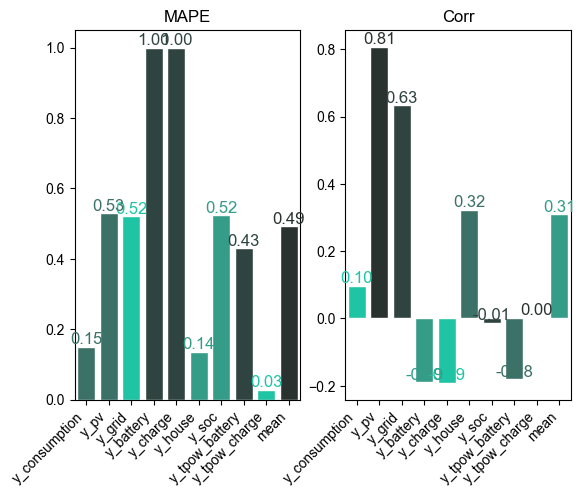

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [27]:
errors_svm = model_svm_wo_lags.evaluate(df_eval)
plot_svm = plot_errors(errors_svm, "SVM")

In [48]:
model_svm = EmsModel(custom_regressor=svm.SVR, custom_regressor_args={},  use_recursive_columns=True)
model_svm.fit(x, y_consumption, y_pv, y_generator, y_grid, y_battery, y_charge,
            y_house, y_electric, y_pump, y_consumer, y_soc, y_tpow_battery,
            y_tpow_charge, y_tpow_electric, y_tpow_pump, y_tpow_consumer, recursive)

In [49]:
errors_svm_lag = model_svm.evaluate(df_eval)

C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set

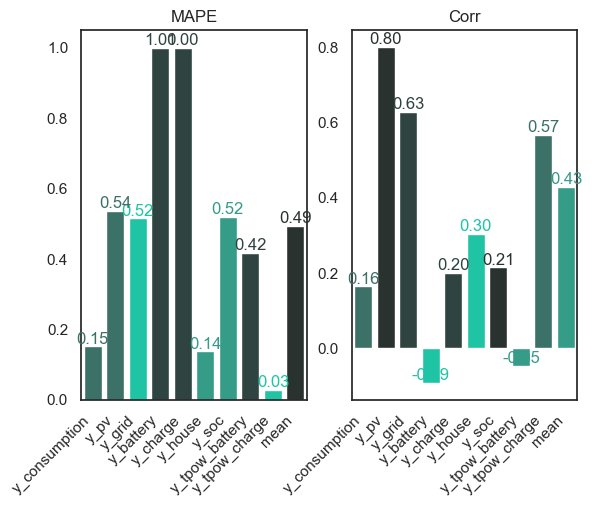

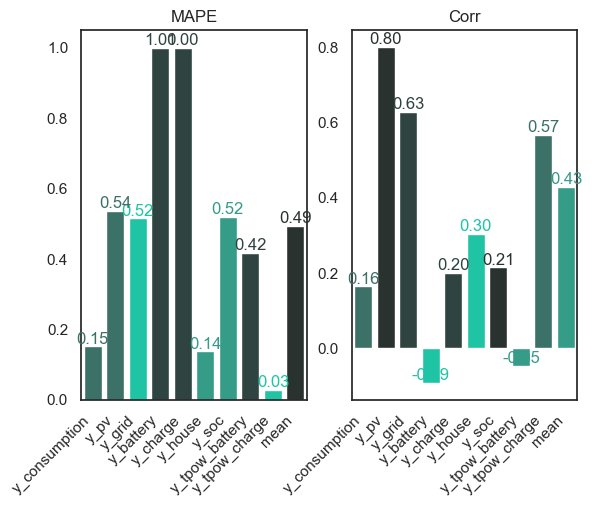

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [55]:
plot_errors(errors_svm_lag, "SVM_lag")

C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set

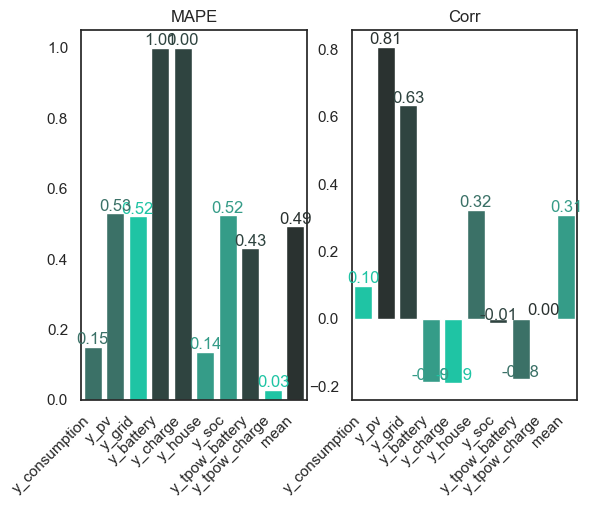

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [54]:
plot_svm = plot_errors(errors_svm, "SVM")

### Comparing Models with/without Hour

In [57]:
preprocessed_data_w_hour = preprocess_ems_data(df, 15, True, add_hour=True)
preprocessed_data_w_hour.head()

,outdoor_temperature,horizontal_radiation,diffuse_radiation,inclined_radiation,normal_radiation,pv1_power,pv2_power,pv3_power,pv4_power,grid1_power,...,hour_sin,day_cos,day_sin,consumption,dayofweek,quarter,month,year,dayofyear,dayofmonth
ts,,,,,,,,,,,,,,,,,,,,,
2023-12-21 16:45:00+01:00,7.392346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.763031,...,-0.866025,0.98522,-0.171293,2.610798,3,4,12,2023,355,21
2023-12-21 17:00:00+01:00,7.484343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.142225,...,-0.965926,0.98522,-0.171293,4.773388,3,4,12,2023,355,21
2023-12-21 17:15:00+01:00,7.586136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.590310,...,-0.965926,0.98522,-0.171293,4.590440,3,4,12,2023,355,21
2023-12-21 17:30:00+01:00,7.673129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.144719,...,-0.965926,0.98522,-0.171293,4.143658,3,4,12,2023,355,21
2023-12-21 17:45:00+01:00,7.764756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.174382,...,-0.965926,0.98522,-0.171293,5.166517,3,4,12,2023,355,21


In [58]:
preprocessed_data_without_hour = preprocess_ems_data(df, 15, True, add_hour=False)
preprocessed_data_without_hour.head()

,outdoor_temperature,horizontal_radiation,diffuse_radiation,inclined_radiation,normal_radiation,pv1_power,pv2_power,pv3_power,pv4_power,grid1_power,...,minute_cos,day_cos,day_sin,consumption,dayofweek,quarter,month,year,dayofyear,dayofmonth
ts,,,,,,,,,,,,,,,,,,,,,
2023-12-21 16:45:00+01:00,7.392346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.763031,...,-0.321439,0.98522,-0.171293,2.610798,3,4,12,2023,355,21
2023-12-21 17:00:00+01:00,7.484343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.142225,...,-0.258819,0.98522,-0.171293,4.773388,3,4,12,2023,355,21
2023-12-21 17:15:00+01:00,7.586136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.590310,...,-0.195090,0.98522,-0.171293,4.590440,3,4,12,2023,355,21
2023-12-21 17:30:00+01:00,7.673129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.144719,...,-0.130526,0.98522,-0.171293,4.143658,3,4,12,2023,355,21
2023-12-21 17:45:00+01:00,7.764756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.174382,...,-0.065403,0.98522,-0.171293,5.166517,3,4,12,2023,355,21


In [59]:
(x_w_hour, y_consumption_w_hour, y_pv_w_hour, y_generator_w_hour, y_grid_w_hour, y_battery_w_hour,
        y_charge_w_hour, y_house_w_hour, y_electric_w_hour, y_pump_w_hour, y_consumer_w_hour,
        y_soc_w_hour, y_tpow_battery_w_hour, y_tpow_charge_w_hour, y_tpow_electric_w_hour, y_tpow_pump_w_hour,
        y_tpow_consumer_w_hour, recursive_w_hour) = get_ems_features(
        preprocessed_data_w_hour,
        lag_steps=[15, 30, 45, 60],
        prediction_steps=[15, 30, 45, 60],
        time_resolution=15,
        lag_label=[15])

In [60]:
(x_without_hour, y_consumption_without_hour, y_pv_without_hour, y_generator_without_hour, y_grid_without_hour, y_battery_without_hour,
        y_charge_without_hour, y_house_without_hour, y_electric_without_hour, y_pump_without_hour, y_consumer_without_hour,
        y_soc_without_hour, y_tpow_battery_without_hour, y_tpow_charge_without_hour, y_tpow_electric_without_hour, y_tpow_pump_without_hour,
        y_tpow_consumer_without_hour, recursive_without_hour) = get_ems_features(
        preprocessed_data_without_hour,
        lag_steps=[15, 30, 45, 60],
        prediction_steps=[15, 30, 45, 60],
        time_resolution=15,
        lag_label=[15])

In [61]:
model_svm_wo_hour = EmsModel(custom_regressor=svm.SVR, custom_regressor_args={})
model_svm_wo_hour.fit(x_without_hour, y_consumption_without_hour, y_pv_without_hour, y_generator_without_hour, y_grid_without_hour, y_battery_without_hour,
        y_charge_without_hour, y_house_without_hour, y_electric_without_hour, y_pump_without_hour, y_consumer_without_hour,
        y_soc_without_hour, y_tpow_battery_without_hour, y_tpow_charge_without_hour, y_tpow_electric_without_hour, y_tpow_pump_without_hour,
        y_tpow_consumer_without_hour, recursive_without_hour)

In [62]:
model_svm_hour = EmsModel(custom_regressor=svm.SVR, custom_regressor_args={})
model_svm_hour.fit(x_w_hour, y_consumption_w_hour, y_pv_w_hour, y_generator_w_hour, y_grid_w_hour, y_battery_w_hour,
        y_charge_w_hour, y_house_w_hour, y_electric_w_hour, y_pump_w_hour, y_consumer_w_hour,
        y_soc_w_hour, y_tpow_battery_w_hour, y_tpow_charge_w_hour, y_tpow_electric_w_hour, y_tpow_pump_w_hour,
        y_tpow_consumer_w_hour, recursive_w_hour)

C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set

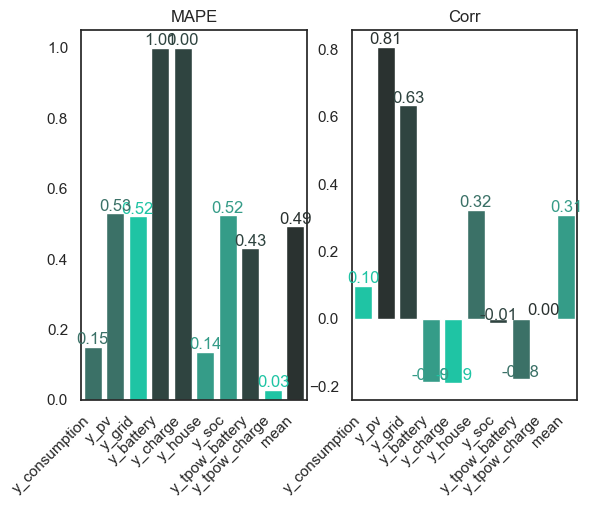

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [64]:
errors_svm_wo_hour = model_svm_wo_hour.evaluate(df_eval)
plot_svm_wo_hour = plot_errors(errors_svm_wo_hour, "SVM-wo-Hour")

C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set

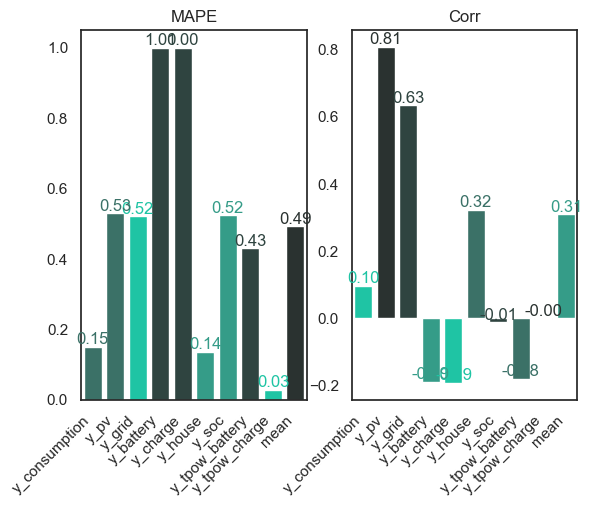

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [67]:
errors_svm_hour = model_svm_hour.evaluate(df_eval, add_hour=True)
plot_svm_hour = plot_errors(errors_svm_hour, "SVM-Hour")

Trying different Project

In [70]:
newModel = getModel(5)
df_eval = newModel.get_dh().get_data(
                int(end_training.timestamp()), int(end.timestamp()))
df = newModel.get_dh().get_data(int(start.timestamp()), int(end_training.timestamp()))

In [71]:
preprocessed = preprocess_ems_data(df, 15, True)
(x, y_consumption, y_pv, y_generator, y_grid, y_battery,
    y_charge, y_house, y_electric, y_pump, y_consumer,
    y_soc, y_tpow_battery, y_tpow_charge, y_tpow_electric, y_tpow_pump,
    y_tpow_consumer, recursive) = get_ems_features(
    preprocessed,
    lag_steps=[15, 30, 45, 60],
    prediction_steps=[15, 30, 45, 60],
    time_resolution=15,
    lag_label=[15])
model = EmsModel(custom_regressor=svm.SVR, custom_regressor_args={})
model.fit(x, y_consumption, y_pv, y_generator, y_grid, y_battery, y_charge,
            y_house, y_electric, y_pump, y_consumer, y_soc, y_tpow_battery,
            y_tpow_charge, y_tpow_electric, y_tpow_pump, y_tpow_consumer, recursive)

C:\Users\jpeff\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=

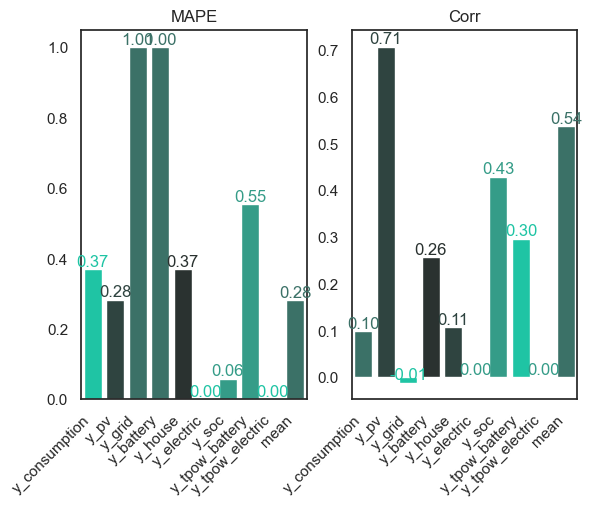

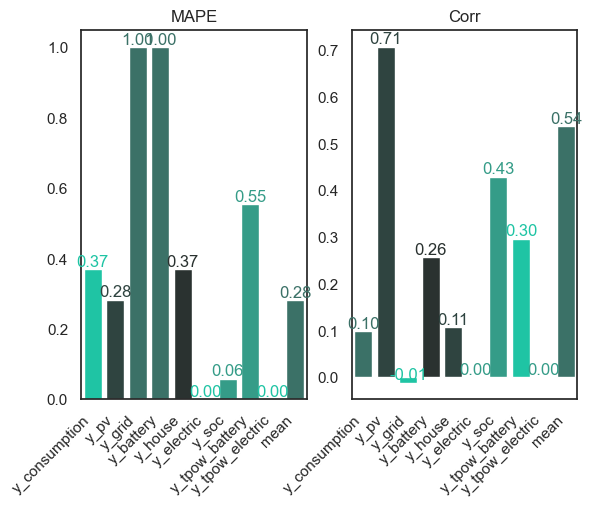

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [72]:
errors_five = model.evaluate(df_eval)
plot_errors(errors_five, "SVM")

In [73]:
preprocessed = preprocess_ems_data(df, 15, True, add_hour=True)
(x, y_consumption, y_pv, y_generator, y_grid, y_battery,
    y_charge, y_house, y_electric, y_pump, y_consumer,
    y_soc, y_tpow_battery, y_tpow_charge, y_tpow_electric, y_tpow_pump,
    y_tpow_consumer, recursive) = get_ems_features(
    preprocessed,
    lag_steps=[15, 30, 45, 60],
    prediction_steps=[15, 30, 45, 60],
    time_resolution=15,
    lag_label=[15])
model_w_hour = EmsModel(custom_regressor=svm.SVR, custom_regressor_args={})
model_w_hour.fit(x, y_consumption, y_pv, y_generator, y_grid, y_battery, y_charge,
            y_house, y_electric, y_pump, y_consumer, y_soc, y_tpow_battery,
            y_tpow_charge, y_tpow_electric, y_tpow_pump, y_tpow_consumer, recursive)

C:\Users\jpeff\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=

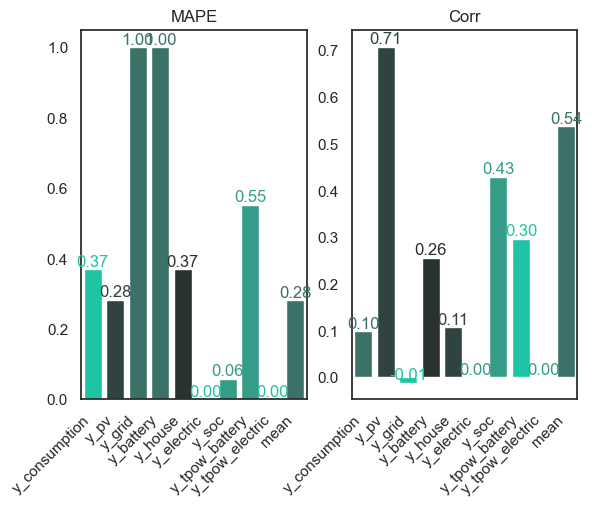

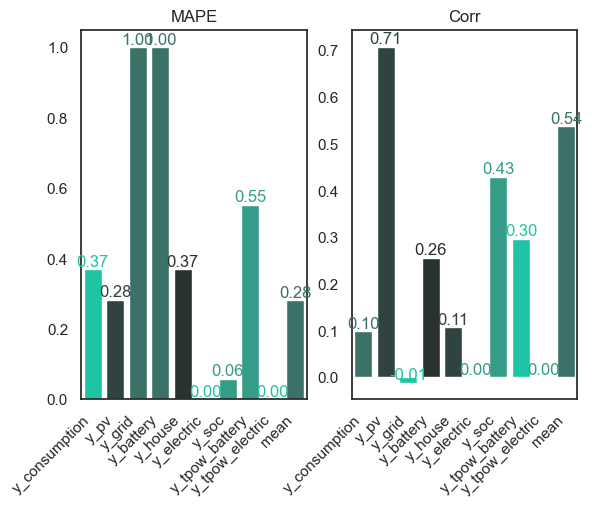

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [74]:
errors_five_w_hour = model_w_hour.evaluate(df_eval, add_hour=True)
plot_errors(errors_five_w_hour, "SVM")

C:\Users\jpeff\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=

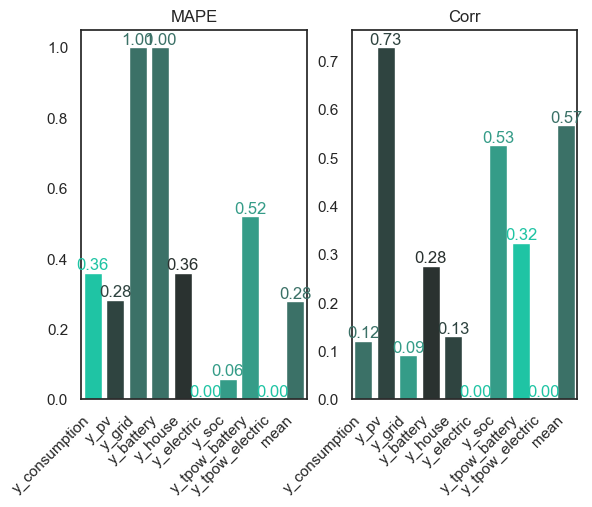

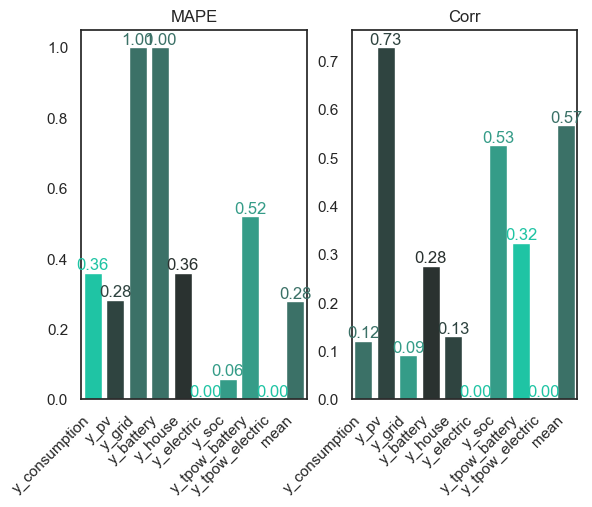

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [77]:
preprocessed = preprocess_ems_data(df, 15, True)
(x, y_consumption, y_pv, y_generator, y_grid, y_battery,
    y_charge, y_house, y_electric, y_pump, y_consumer,
    y_soc, y_tpow_battery, y_tpow_charge, y_tpow_electric, y_tpow_pump,
    y_tpow_consumer, recursive) = get_ems_features(
    preprocessed,
    lag_steps=[15, 30, 45, 60],
    prediction_steps=[15, 30, 45, 60],
    time_resolution=15,
    lag_label=[15])
model = EmsModel(custom_regressor=svm.SVR, custom_regressor_args={}, use_recursive_columns=True)
model.fit(x, y_consumption, y_pv, y_generator, y_grid, y_battery, y_charge,
            y_house, y_electric, y_pump, y_consumer, y_soc, y_tpow_battery,
            y_tpow_charge, y_tpow_electric, y_tpow_pump, y_tpow_consumer, recursive)
errors_five = model.evaluate(df_eval)
plot_errors(errors_five, "SVM")

In [75]:
preprocessed = preprocess_ems_data(df, 15, True)
(x, y_consumption, y_pv, y_generator, y_grid, y_battery,
    y_charge, y_house, y_electric, y_pump, y_consumer,
    y_soc, y_tpow_battery, y_tpow_charge, y_tpow_electric, y_tpow_pump,
    y_tpow_consumer, recursive) = get_ems_features(
    preprocessed,
    lag_steps=[15, 30, 45, 60],
    prediction_steps=[15, 30, 45, 60],
    time_resolution=15,
    lag_label=[15])
model = EmsModel()
model.fit(x, y_consumption, y_pv, y_generator, y_grid, y_battery, y_charge,
            y_house, y_electric, y_pump, y_consumer, y_soc, y_tpow_battery,
            y_tpow_charge, y_tpow_electric, y_tpow_pump, y_tpow_consumer, recursive)

C:\Users\jpeff\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\jpeff\AppData\Local\Temp\ipykernel_9584\1548108071.py:25: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=

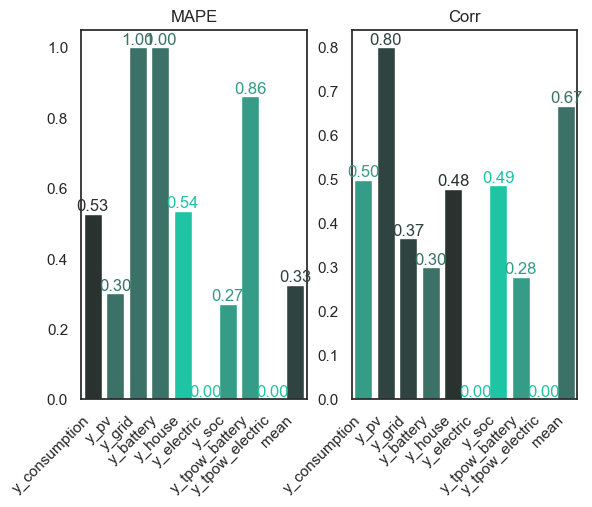

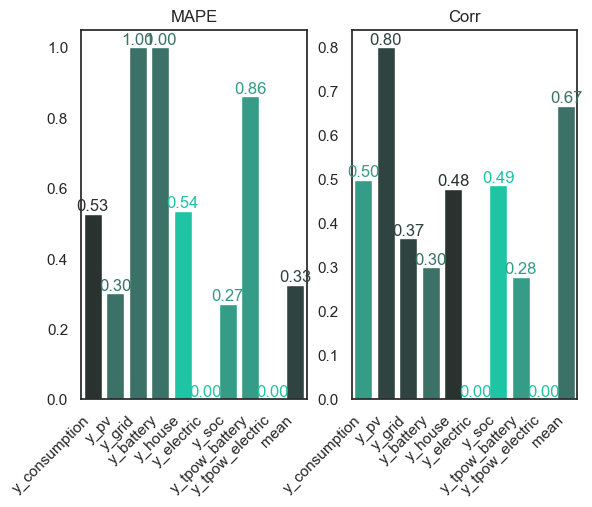

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [76]:
errors_five = model.evaluate(df_eval)
plot_errors(errors_five, "SVM")